In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)

df['PRICE'] = housing.target

print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


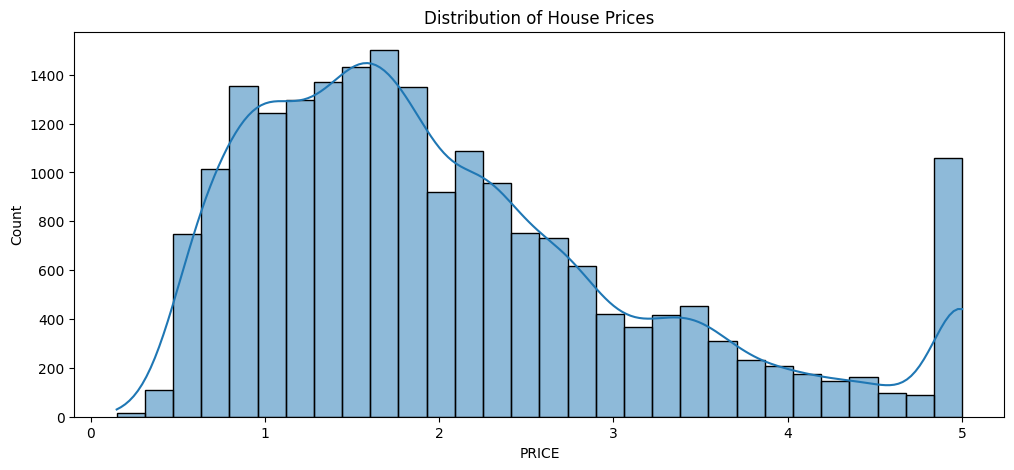

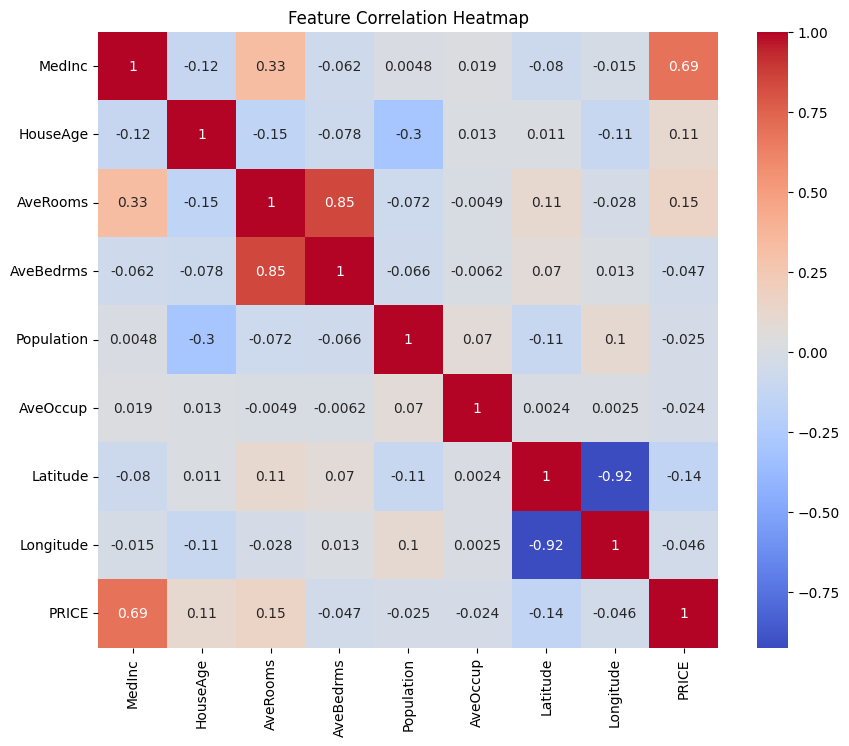

In [ ]:
# Plot the distribution of house prices
plt.figure(figsize=(12, 5))
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()  # Display

# Plot a heatmap to visualize
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Calculate R-squared score

# Print the calculated metrics
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.9f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.55589
Root Mean Squared Error: 0.745581383
R² Score: 0.5758


In [ ]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison.head())

        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657


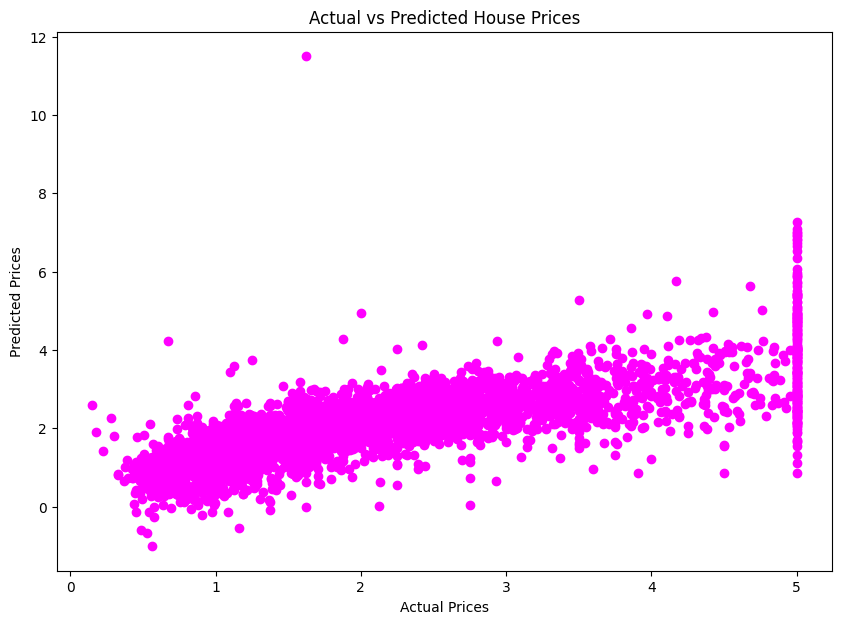

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=1.0, color="magenta")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()